Missing values before:
Rtn..1.Day      2
Rtn..1.Day.1    3
Rtn..2.Day      4
dtype: int64

Missing values after:
Rtn..1.Day      0
Rtn..1.Day.1    0
Rtn..2.Day      0
dtype: int64


,Date,Count
0,2000-06-12,1
1,2000-06-13,1
2,2000-06-14,1
3,2000-06-15,1
4,2000-06-16,1


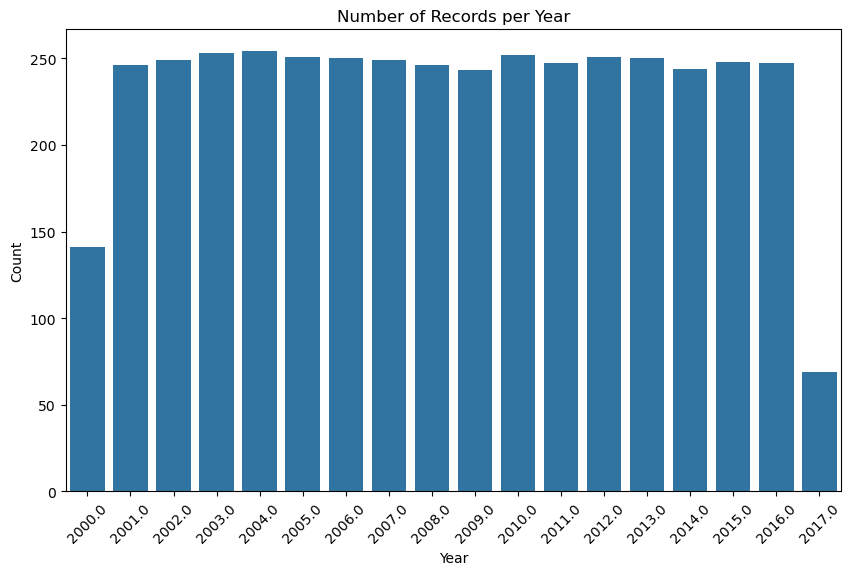

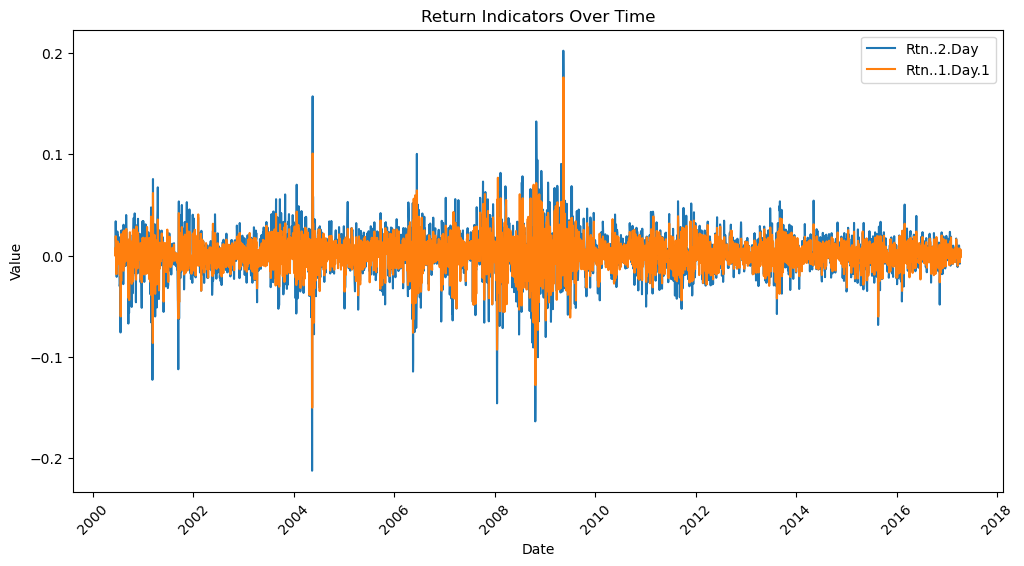

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset 
df = pd.read_csv("data/data_with_indicators1.csv")

print("Missing values before:")
cols = ["Rtn..1.Day", "Rtn..1.Day.1", "Rtn..2.Day"]
print(df[cols].isna().sum())

# Fill missing values with median
for c in cols:
    df[c] = df[c].fillna(df[c].median())

print("\nMissing values after:")
print(df[cols].isna().sum())

# Convert Date + extract Year/Month/Day
df["Date"] = pd.to_datetime(df["Date"], format="%Y/%m/%d", errors="coerce")
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

# Summary: records per date
summary = df.groupby("Date").size().reset_index(name="Count")
display(summary.head())

# Chart 1: number of records per year
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Year")
plt.title("Number of Records per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Chart 2: returns over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Rtn..2.Day", label="Rtn..2.Day")
sns.lineplot(data=df, x="Date", y="Rtn..1.Day.1", label="Rtn..1.Day.1")
plt.title("Return Indicators Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.show()
